# Task: sentiment classification

The task is to classify one-sentence long movie reviews/opinions according to the sentiment they express. There are only two categories: positive and negative sentiment.


> "Data source: [UMICH SI650 - Sentiment Classification](https://www.kaggle.com/c/si650winter11/data)

> Training data: 7086 lines. 
  
> Format: 1|0 (tab) sentence

> Test data: 33052 lines, each contains one sentence. 

> The data was originally collected from opinmind.com (which is no longer active)."

The data is in the file "sentiment.tsv".

## Download/install necessary components/data

In [ ]:
! python -m spacy download en_core_web_sm
! pip install wordcloud
! wget "https://drive.google.com/uc?export=download&id=19NUVV29Pq-j2WrNBYf6WRD8or7SOUHp2" -O sentiment.tsv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-28 12:35:31--  https://drive.google.com/uc?export=download&id=19NUVV29Pq-j2WrNBYf6WRD8or7SOUHp2
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.113, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rhrq4vc5enjrs9rkf498ja1knsmtcd4r/1666960500000/10227734428265054086/*/19NUVV29Pq-j2WrNBYf6WRD8or7SOUHp2?e=download&uuid=ad3433f6-ec86-4e5c-b3f8-2a2af299d1fb [following]
--2022-10-28 12:35:31--  ht

# Loading the data

In [ ]:
import pandas as pd

df = pd.read_csv('sentiment.tsv', sep='\t',   ## 
                 quoting=3, # Quotes are _never_ field separators
                 header=None)

df.head()

,0,1
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [ ]:
df = df[[1,0]] # reorder columns

df.rename(columns={1:"text", 0:"sentiment"}, inplace=True) # rename columns

df.head()

,text,sentiment
0,The Da Vinci Code book is just awesome.,1
1,this was the first clive cussler i've ever rea...,1
2,i liked the Da Vinci Code a lot.,1
3,i liked the Da Vinci Code a lot.,1
4,I liked the Da Vinci Code but it ultimatly did...,1


# Splitting into train, validation and test

Before doing anything else (!) we divide our data into train, validation and test parts,

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test_valid = train_test_split(df, test_size = 0.2, shuffle=True,  # (although shuffle=True is the default anyway...)
                                           random_state=13, # fix the seed
                                           stratify=df["sentiment"],  # to make sure both splits contain same proportion of classes
                                           ) 

df_test, df_valid = train_test_split(df_test_valid, test_size = 0.5,
                                           random_state=13, # fix the seed
                                           stratify=df_test_valid["sentiment"],  # to make sure both splits contain same proportion of classes
                                           )

print(len(df_train), len(df_valid), len(df_test))

5668 709 709


In [ ]:
print("Classes (%):")
pd.concat([df_train["sentiment"].rename("train").value_counts() / len(df_train) * 100,
          df_valid["sentiment"].rename("valid").value_counts() / len(df_valid) * 100,
          df_test["sentiment"].rename("test").value_counts() / len(df_test) * 100,], axis=1).sort_index().round(2)

Classes (%):


,train,valid,test
0,43.61,43.72,43.58
1,56.39,56.28,56.42


# Inspecting the data

In [ ]:
df_train.describe()

,sentiment
count,5668.000000
mean,0.563867
std,0.495948
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


We can examine the lengths of sentences as well.

In [ ]:
n_chars = df_train.text.apply(lambda x: len(x))

n_chars.describe()

count    5668.000000
mean       59.988885
std        38.119805
min        18.000000
25%        32.000000
50%        47.000000
75%        77.000000
max       228.000000
Name: text, dtype: float64

The first sentence with the maximal length:

In [ ]:
long_sentence = df_train.loc[n_chars.idxmax(), "text"]
long_sentence

'We had some awesome times at school in between classes, from settin things on fire to doing Mission Impossible things in the halls, to partyin weekends and clubbin to lunch in between classes causing disruption wherever we went.'

# Extra task: Let's do a word cloud!

Let us visualize together and separately (by category) the sentences!

Tool: https://github.com/amueller/word_cloud


Good example: https://github.com/amueller/word_cloud/blob/master/examples/simple.py



In [ ]:
# Helper function for displaying a word cloud
# Input: one _UNIFIED_, space separated string!
# Protip: https://www.tutorialspoint.com/python/string_join.htm
def do_wordcloud(text, figsize=(15, 10)):
    from wordcloud import WordCloud
    
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


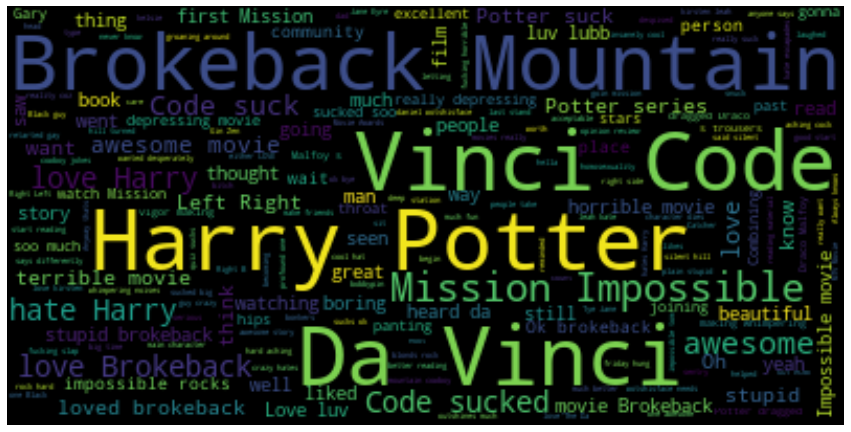

In [ ]:
### TASK !!! ####
#Put here the world cloud!

do_wordcloud( df_train["text"].str.cat(sep=" ") )
## an alternative:
# do_wordcloud(' '.join(df_train["text"].values))


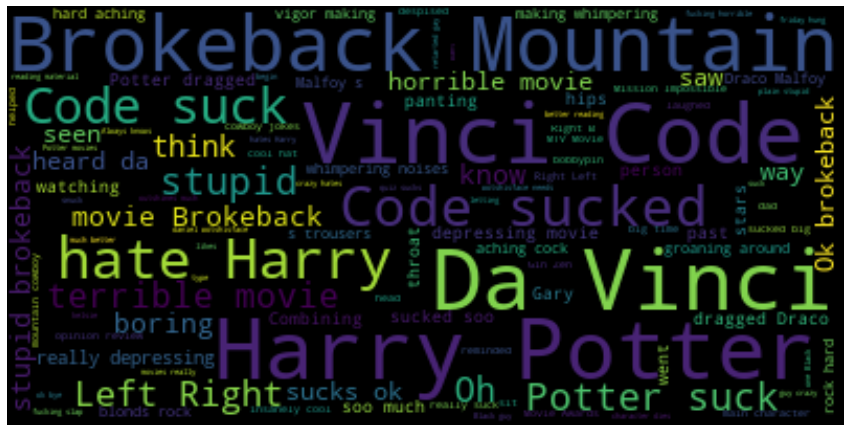

In [ ]:
### TASK !!! ####
# Here only the cloud for sentences with negative sentiment!
# Help: the shape of the DataFrame with only the negative sentences is: (2975, 2)
# Source: https://pandas.pydata.org/pandas-docs/stable/indexing.html

do_wordcloud( df_train[df_train["sentiment"]==0]["text"].str.cat(sep=" ") )

## or:
#do_wordcloud(' '.join(df_train[df_train["sentiment"]==0]["text"].values))


# Bag of words (BoW) representation of the texts

We will represent each text as a (sparse) vector of lemma (word root) counts for frequent lemmas in the training data. 

For tokenization and lemmatization we use [spaCy](https://spacy.io/), an open source Python NLP library, which can produce a list of unique lemma ids from the text.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"]) # We need only the tokenizer

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


spaCy can produce spaCy Doc objects from texts that contain their linguistic analysis, among others lemmas and their unique spaCy string ids.

In [ ]:
doc = nlp(long_sentence)
type(doc)

spacy.tokens.doc.Doc

In [ ]:
print([token.lemma_ for token in doc ]) # Lemmas

['a', 'mother', 'in', 'Georgia', 'want', 'her', 'local', 'school', 'board', 'to', 'take', 'Harry', 'Potter', 'out', 'of', 'the', 'school', 'and', 'library', 'because', ',', 'in', 'her', 'opinion', ',', 'read', 'Harry', 'Potter', 'lead', 'to', 'witchcraft', ',', 'which', 'accord', 'to', 'she', 'be', 'evil', '...']


In [ ]:
print([token.lemma for token in doc]) # Corresponding unique ids

[11901859001352538922, 7963322251145911254, 3002984154512732771, 309210702643012516, 7597692042947428029, 4115755726172261197, 16319852998319793599, 13293160603192985325, 14899812206273857344, 3791531372978436496, 6789454535283781228, 5164779919001708464, 2416965663249996073, 1696981056005371314, 886050111519832510, 7425985699627899538, 13293160603192985325, 2283656566040971221, 1785747669126016609, 16950148841647037698, 2593208677638477497, 3002984154512732771, 4115755726172261197, 14536103007527724270, 2593208677638477497, 11792590063656742891, 5164779919001708464, 2416965663249996073, 82546335403996757, 3791531372978436496, 17905374590688478165, 2593208677638477497, 7063653163634019529, 701735504652304602, 3791531372978436496, 6740321247510922449, 10382539506755952630, 15036397985088571056, 10875615029400813363]


Now we have to convert these lists into BoW vectors. We could "roll our own", but, fortunately, scikit-learn has a feature extractor doing exactly that, the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) so, for the sake of simplicity, we will use that along with spaCy.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def spacy_lemmatizer(s): 
    return [token.lemma for token in nlp(s)]
    
cv = CountVectorizer(analyzer=spacy_lemmatizer, #spaCy for analysis (we could use a lambda function, but with def, we see the function name explicitly)
                     min_df= 0.001) # We ignore the lemmas with low document frequency
cv

CountVectorizer(analyzer=<function spacy_lemmatizer at 0x7f79fbfa3290>,
                min_df=0.001)

In [ ]:
sents = ["I hate this movie.", "The movie is the worst I've seen."]
bows = cv.fit_transform(sents)
# CountVectorizer produces a sparse matrix so we convert to ndarray to inspect it.
# The rows are the sentences, the columns are the features: in our case, lemmas.
pd.DataFrame(bows.toarray(), columns=[nlp.tokenizer.vocab.strings[k] for k in cv.get_feature_names_out()])

,this,'ve,I,the,hate,be,see,bad,.,movie
0,1,0,1,0,1,0,0,0,1,1
1,0,1,1,2,0,1,1,1,1,1


In [ ]:
for stop_words in [None, "english"]:
    print(f"Not spacy, but sklearn tokenization; stop_words: {stop_words}:")
    cv2 = CountVectorizer(analyzer="word", #spaCy for analysis
                        stop_words=stop_words,
                        min_df= 0.001) # We ignore the lemmas with low document frequency
    bows2 = cv2.fit_transform(sents)
    # A CountVectorizer produces a sparse matrix, we convert to ndarray to inspect it.
    # The rows are the sentences, the columns are the features: in our case, lemmas.
    display(pd.DataFrame(bows2.toarray(), columns=[k for k in cv2.get_feature_names_out()]))
    print()

Not spacy, but sklearn tokenization; stop_words: None:


,hate,is,movie,seen,the,this,ve,worst
0,1,0,1,0,0,1,0,0
1,0,1,1,1,2,0,1,1



Not spacy, but sklearn tokenization; stop_words: english:


,hate,movie,seen,ve,worst
0,1,1,0,0,0
1,0,1,1,1,1


(We may notice some features of the spacy lemmatizer.)

Using the CountVectorizer we convert the text columns of our train, validation and  test data into three sparse matrices:

In [ ]:
bows_train = cv.fit_transform(df_train.text)
bows_train.sort_indices() # comes from TF2.0 sparse implementation, obscure requirement
bow_length = bows_train.shape[1]
print("BoW length:", bow_length)
bows_train

BoW length: 390


<5668x390 sparse matrix of type '<class 'numpy.int64'>'
	with 64207 stored elements in Compressed Sparse Row format>

In [ ]:
## not necessary for the model, just so that we can check some encodings:
cv_key_lemmahash_dict = {v: [k for k in cv.vocabulary_.keys() if cv.vocabulary_[k] == v][0] for v in cv.vocabulary_.values()}
cv_key_lemmastring_dict = {k: nlp.tokenizer.vocab.strings[cv_key_lemmahash_dict[k]] for k in cv_key_lemmahash_dict.keys() }

In [ ]:
## Just a little insight into spacy lemmatizer:
print("'Awesome' lemmas:")
print([k for k in cv_key_lemmastring_dict.values() if k.lower() == "awesome"], "\n")
wholetext = df["text"].str.cat(sep=" ")
for k in ["Awesome", "awesome", "AWESOME"]:
  print(k, "in a sentence:", k in wholetext)

'Awesome' lemmas:
['AWESOME', 'awesome'] 

Awesome in a sentence: True
awesome in a sentence: True
AWESOME in a sentence: True


In [ ]:
## choose item index
idx = 0

print(f"The sentence at index {idx}:")
print(df_train["text"].iloc[idx], "\n")

print("Its cv representation in the sparse matrix (index: (document, term), values: occurrences):")
tmp = bows_train[idx,:]
print()
print(tmp, "\n")

## using the dict we defined:
print("CountVectorizer-encoded terms turned into the strings they encode:")
tmps = pd.Series(tmp.toarray()[0][tmp.indices], index=[cv_key_lemmastring_dict[k] for k in tmp.indices])
print(tmps, "\n")

The sentence at index 0:
Harry Potter is AWESOME I don't care if anyone says differently!.. 

Its cv representation in the sparse matrix (index: (document, term), values: occurrences):

  (0, 8)	1
  (0, 9)	1
  (0, 48)	1
  (0, 54)	1
  (0, 104)	1
  (0, 112)	1
  (0, 175)	1
  (0, 195)	1
  (0, 199)	1
  (0, 229)	1
  (0, 271)	1
  (0, 301)	1
  (0, 304)	1
  (0, 373)	1 

CountVectorizer-encoded terms turned into the strings they encode:
anyone         1
not            1
do             1
Potter         1
I              1
Harry          1
AWESOME        1
say            1
..             1
be             1
if             1
differently    1
care           1
!              1
dtype: int64 



In [ ]:
bows_valid = cv.transform(df_valid.text)
bows_valid.sort_indices() # comes from TF2.0 sparse implementation, obscure requirement
bows_test = cv.transform(df_test.text)
bows_test.sort_indices() # comes from TF2.0 sparse implementation, obscure requirement

# The model

We build a feed-forward neural network for our binary classification task, which will be trained with cross-entropy loss and minibatch SGD.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

## set random seed for reproducibility:
tf.random.set_seed(42)

## clear session: important if we retrain the model with different hyperparams
tf.keras.backend.clear_session()

# Parameters
############

hidden_size = 100

# Model
#######

## sequential API version:
'''
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=hidden_size, activation="relu", input_shape=(bows_train.shape[1],)))
model.add( Dense(units=2, activation="softmax"))

'''

## functional API version:
# Input layer
inputs = Input(shape=(bow_length,))

# Hidden layer
hidden_output = Dense(hidden_size, activation='relu')(inputs)

# Softmax 
predictions = Dense(2, activation='softmax')(hidden_output)

# Full model
model = Model(inputs=inputs, outputs=predictions)


# Optimizer
####################

optimizer = SGD(learning_rate=0.1)
 

# Compilation and fitting 
#########################

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', # we use this cross entropy variant as the input is not 
                                                      # one-hot encoded
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 390)]             0         
                                                                 
 dense (Dense)               (None, 100)               39100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 39,302
Trainable params: 39,302
Non-trainable params: 0
_________________________________________________________________
None


# Training

In [ ]:
history = model.fit(x=bows_train, 
          y=df_train.sentiment.values,
          validation_data=(bows_valid, df_valid.sentiment.values),
          epochs=10,
          batch_size=200)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


29/29 [==============================] - 3s 11ms/step - loss: 0.5184 - accuracy: 0.8100 - val_loss: 0.4072 - val_accuracy: 0.8900
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.9467 - val_loss: 0.2624 - val_accuracy: 0.9563
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: 0.2014 - accuracy: 0.9725 - val_loss: 0.1838 - val_accuracy: 0.9633
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9758 - val_loss: 0.1453 - val_accuracy: 0.9633
Epoch 5/10
29/29 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 0.9776 - val_loss: 0.1196 - val_accuracy: 0.9676
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9790 - val_loss: 0.1046 - val_accuracy: 0.9690
Epoch 7/10
29/29 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9820 - val_loss: 0.0932 - val_accuracy: 0.9704
Epoch 8/10
29/29 [============

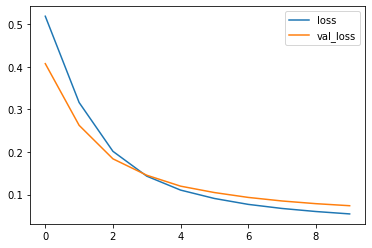

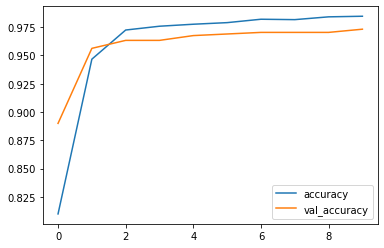

In [ ]:
## Run the code and interpret the plots.

historydf = pd.DataFrame(history.history)

historydf[["loss", "val_loss"]].plot();

historydf[["accuracy", "val_accuracy"]].plot();

# Prediction

In [ ]:
print("=== INTERACTIVE DEMO ===")
while True:
    s = input("Enter a short text to evaluate or press return to quit: ")
    if s == "":
        break
    else:
        bow = cv.transform([s])
        prob_pred = model.predict(bow[0])
        print(f"Positive vs negative sentiment probability: {prob_pred[0,1]} vs {prob_pred[0,0]}\n")

=== INTERACTIVE DEMO ===
Enter a short text to evaluate or press return to quit: 
